<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 3: Large-Scale Data Exploration for Insider Threat Detection  (2022)
---

The completion of this worksheet is worth a **maximum of 45 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

In this task, you have been asked to investigate a potential security threat within an organisation. Building on your previous worksheet expertise, you will need to apply your skills and knowledge of data analytics and visualisation to examine and explore the datasets methodically to uncover which employee is acting as a threat and why. The company have provided you with activity logs for various user interactions for the past 6 months, resulting in a lot of data that they need your expertise for to decipher. They want to have a report that details the investigation that you have carried out, details of the suspected individual, and a clear rationale as to why this suspect is flagged. You will need to document your investigation, giving clear justification for your process using Markdown annotation within your notebook. You will need to provide a clear rationale for why you suspect a given individual to be acting as a threat, based on the pattern of activity that you identify.

<i>This coursework is specifically designed to challenge your critical thinking and creativity, and is designed as an open problem. Examine the data and try to think how an individual user may appear as an anomaly against the remainder of the data. This could be an anomaly compared to a group of users, or an anomaly as compared over time.</i>

### Assessment and Marking
---

Marks will be allocated within the following criteria:

* **Identification and justification of the suspicious behaviour (15)**
* **Analytical process and reasoning to deduce the suspicious behaviour (15)**
* **Use of informative visualisation and data exploration techniques (10)**
* **Clarity and professional presentation (5)**

To achieve the higher end of the grade scale, you need to demonstrate creativity in how you approach the problem of identifying malicious behaviours, and ensure that you have accounted for multiple anomalies across the set of data available.

This assignment should be submitted as as PDF to your Blackboard portfolio submission as per the instructions in the assignment specification available on Blackboard. A copy of your work should also be provided via a UWE Gitlab repository, with an accessible link provided with your portfolio.

### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---


## Load in the data

In [37]:
# DO NOT MODIFY THIS CELL - this cell is splitting the data to provide a suitable subset of data to work with for this task.
# If you change this cell your output will differ from that expected and could impact your mark.

import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

dataset_list = ['onlinebargains']
DATASET = dataset_list[0]

def load_data(DATASET):
    if DATASET in dataset_list:
        email_data = pd.read_csv('./T3_data/' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./T3_data/' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./T3_data/' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./T3_data/' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./T3_data/' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./T3_data/' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)


print("Employee Data\n")
print(employee_data.head(5))
print("-----")
print("Login data \n")
print(login_data.head(5))
print("-----")
print("USB Data\n")
print(usb_data.head(5))
print("-----")
print("Web Data\n")
print(web_data.head(5))
print("-----")
print("File Data\n")
print(file_data.head(5))
print("-----")
print("Email Data\n")
print(email_data.head(5))


Employee Data

      user      role                       email   pc
0  usr-uda  Security  usr-uda@onlinebargains.com  pc0
1  usr-hhe  Security  usr-hhe@onlinebargains.com  pc1
2  usr-vxr   Finance  usr-vxr@onlinebargains.com  pc2
3  usr-nba   Finance  usr-nba@onlinebargains.com  pc3
4  usr-hqt   Finance  usr-hqt@onlinebargains.com  pc4
-----
Login data 

             datetime     user action     pc
0 2020-01-01 00:21:33  usr-hyo  login  pc205
1 2020-01-01 00:21:39  usr-ipd  login  pc230
2 2020-01-01 00:34:25  usr-nrx  login  pc169
3 2020-01-01 00:35:10  usr-hfz  login  pc111
4 2020-01-01 00:39:04  usr-hhe  login    pc1
-----
USB Data

                    datetime     user      action     pc
0 2020-01-01 04:34:12.544490  usr-mcr  usb_insert   pc13
1 2020-01-01 04:38:24.821774  usr-udb  usb_insert   pc66
2 2020-01-01 04:40:59.860587  usr-con  usb_insert  pc146
3 2020-01-01 04:45:49.701116  usr-xsn  usb_insert   pc30
4 2020-01-01 04:49:10.958272  usr-rjw  usb_insert  pc226
-----
Web Data

The cell above is creating a set of DataFrames to work with. The set of tables are named as follows:

* employee_data
* login_data
* usb_data
* web_data
* file_data
* email_data



# 1. Begin investigation

To start I will investigate...

First I want to view the average login time for user's with a special role: Security, Technical and Director. 

In [21]:
employee_data["role"].value_counts()
security_employees = employee_data[employee_data["role"] == "Security"]
security_login_data = pd.merge(security_employees, login_data, on="user")


#Average login time per user
security_login_time = security_login_data.groupby('user')['datetime'].mean()
print("Security login time average is:\n")
print(security_login_time)
print("---------------------------------------")
technical_employees = employee_data[employee_data["role"] == "Technical"]
technical_login_data = pd.merge(technical_employees, login_data, on="user")

#Average login time per user
technical_login_time = technical_login_data.groupby('user')['datetime'].mean()
print("Technical login time average is:\n")
print(technical_login_time)

print("---------------------------------------")
director_employees = employee_data[employee_data["role"] == "Director"]
director_login_data = pd.merge(director_employees, login_data, on="user")

director_login_time = director_login_data.groupby('user')['datetime'].mean()
print("Director Login Time average is: \n")
print(director_login_time)

Security login time average is:

user
usr-alj   2020-06-16 11:26:12.161193984
usr-cyr   2020-06-16 11:26:25.971641600
usr-duj   2020-06-16 11:34:59.470149376
usr-hfz   2020-06-16 11:33:09.217910528
usr-hhe   2020-06-16 11:28:37.171641856
usr-hiz   2020-06-16 11:29:32.359701504
usr-hpt   2020-06-16 11:29:41.614925312
usr-hui   2020-06-16 11:26:20.852238848
usr-hvk   2020-06-16 11:25:36.734328320
usr-hzp   2020-06-16 11:42:06.870149376
usr-ipd   2020-06-16 11:37:33.226865664
usr-jmr   2020-06-16 11:28:24.034328320
usr-kvv   2020-06-16 11:34:40.331343104
usr-kzn   2020-06-16 11:27:18.695522304
usr-mdl   2020-06-16 11:30:03.032835840
usr-naf   2020-06-16 11:35:52.404477696
usr-nbg   2020-06-16 11:29:20.168656640
usr-ngr   2020-06-16 11:31:40.553731328
usr-npr   2020-06-16 11:25:22.888059648
usr-nrx   2020-06-16 11:39:59.191044864
usr-olj   2020-06-16 11:30:38.192537344
usr-pzz   2020-06-16 11:32:52.779104512
usr-rnt   2020-06-16 11:27:25.708955136
usr-ryi   2020-06-16 11:25:46.746268672
us

Now I have this information, I want to view the email data from these 3 roles to see if I can see any anomalous data

<AxesSubplot:title={'center':'Number of emails sent by security users'}, xlabel='User', ylabel='Number of emails'>

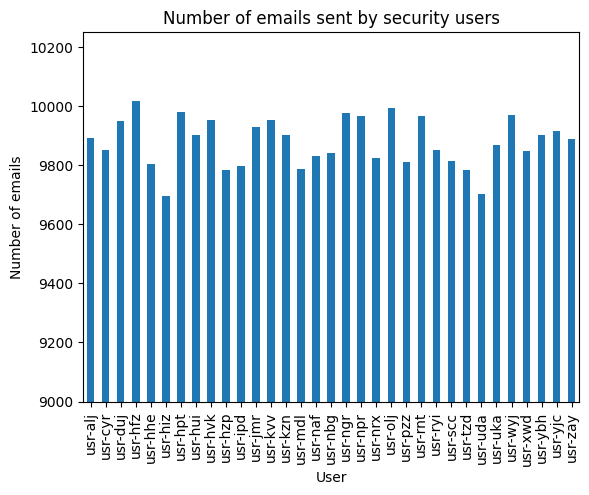

In [22]:
#Filter employee_data dataframe to only select rows for users with a security role
security_employees = employee_data[employee_data['role'] == 'Security']

#merge the dataframes on the 'email' and 'sender' columns
security_email_data = pd.merge(security_employees, email_data, left_on='email', right_on='sender')

#group security_email_data by user and coutn number of rows in each group
email_count = security_email_data.groupby('user').size()

email_count.plot(kind='bar', title='Number of emails sent by security users', xlabel='User', ylabel='Number of emails', ylim = (9000,10250))


<AxesSubplot:title={'center':'Number of emails sent by technical users'}, xlabel='User', ylabel='Number of emails'>

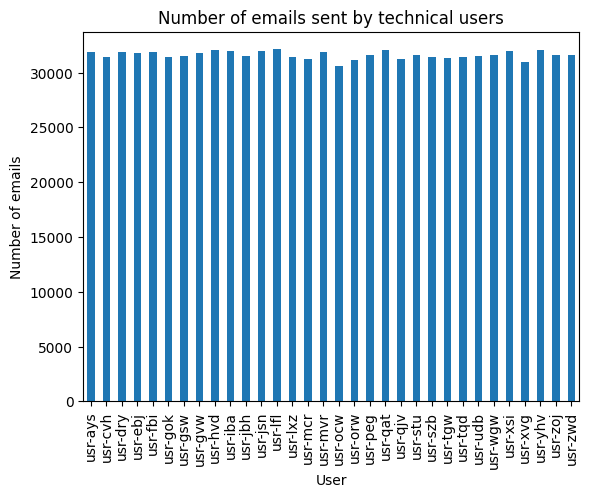

In [23]:
technical_employees = employee_data[employee_data['role'] == 'Technical']

technical_email_data = pd.merge(technical_employees, email_data, left_on='email', right_on='sender')

email_count = technical_email_data.groupby('user').size()

email_count.plot(kind='bar', title='Number of emails sent by technical users', xlabel='User', ylabel='Number of emails')


<AxesSubplot:title={'center':'Number of emails sent by director users'}, xlabel='User', ylabel='Number of emails'>

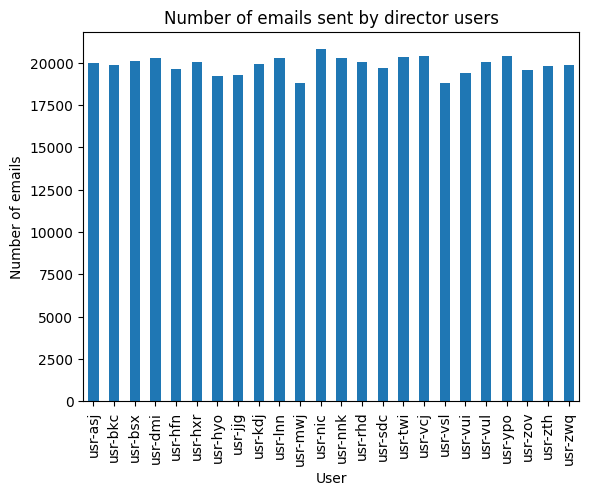

In [24]:
director_employees = employee_data[employee_data['role'] == 'Director']

director_email_data = pd.merge(director_employees, email_data, left_on='email', right_on='sender')
email_count = director_email_data.groupby('user').size()
email_count.plot(kind='bar', title='Number of emails sent by director users', xlabel='User', ylabel='Number of emails')



I haven't found any suspicious activity, now I want to investigate the email's received data instead of emails sent.

<AxesSubplot:title={'center':'Number of emails received by security users'}, xlabel='User', ylabel='Number of emails'>

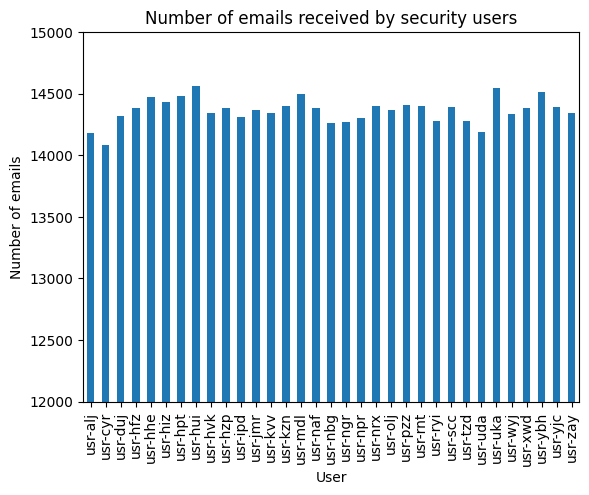

In [25]:
#Filter employee_data to select rows with security role
security_employees = employee_data[employee_data['role'] == 'Security']

#Merge dataframes on the 'email' and 'recipient' columns
security_email_data_recipients = pd.merge(security_employees, email_data, left_on='email', right_on='recipient')

#Group by user and count the no. rows in each group
email_count_recipients = security_email_data_recipients.groupby('user').size()
email_count_recipients.plot(kind='bar', title='Number of emails received by security users', xlabel='User', ylabel='Number of emails', ylim = (12000,15000))

<AxesSubplot:title={'center':'Number of emails received by technical users'}, xlabel='User', ylabel='Number of emails'>

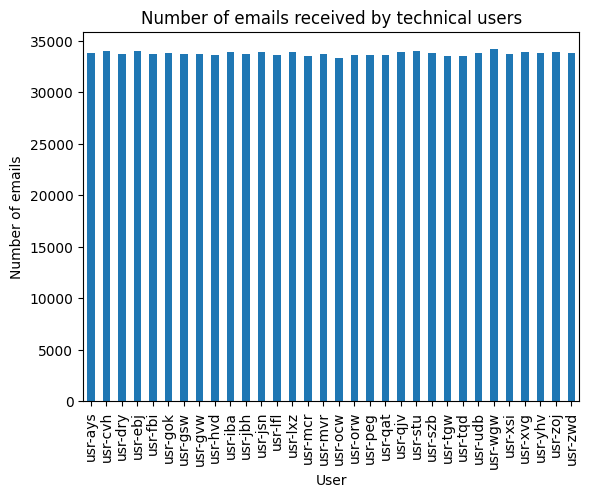

In [26]:
technical_employees = employee_data[employee_data['role'] == 'Technical']
technical_email_data_recipients = pd.merge(technical_employees, email_data, left_on='email', right_on='recipient')

email_count_recipients = technical_email_data_recipients.groupby('user').size()

email_count_recipients.plot(kind='bar', title='Number of emails received by technical users', xlabel='User', ylabel='Number of emails')

<AxesSubplot:title={'center':'Number of emails received by director users'}, xlabel='User', ylabel='Number of emails'>

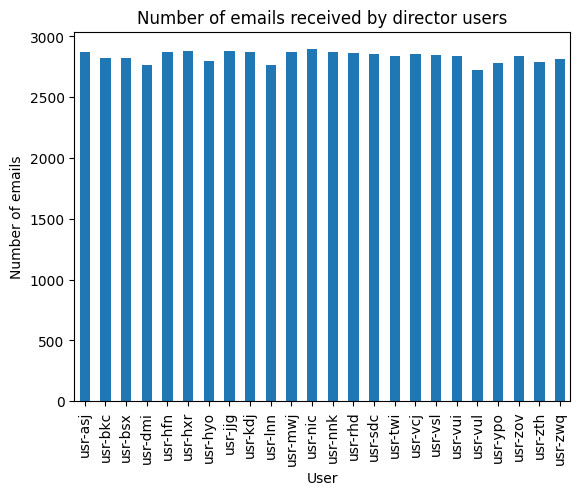

In [27]:
director_employees = employee_data[employee_data['role'] == 'Director']

director_email_data_recipients = pd.merge(director_employees, email_data, left_on='email', right_on='recipient')


email_count_recipients = director_email_data_recipients.groupby('user').size()

email_count_recipients.plot(kind='bar', title='Number of emails received by director users', xlabel='User', ylabel='Number of emails')

I can't find anything useful from this part of my investigation, so I want to take a different approach. Now i'm going to investigate the websites each user from the 3 roles have visited, starting with security role.

I am also going to check how many times these user's inserted USB's into their machines. 

        user      role                       email     pc
0    usr-uda  Security  usr-uda@onlinebargains.com    pc0
1    usr-hhe  Security  usr-hhe@onlinebargains.com    pc1
7    usr-zay  Security  usr-zay@onlinebargains.com    pc7
10   usr-mdl  Security  usr-mdl@onlinebargains.com   pc10
16   usr-yjc  Security  usr-yjc@onlinebargains.com   pc16
23   usr-hvk  Security  usr-hvk@onlinebargains.com   pc23
24   usr-ybh  Security  usr-ybh@onlinebargains.com   pc24
38   usr-ryi  Security  usr-ryi@onlinebargains.com   pc38
42   usr-duj  Security  usr-duj@onlinebargains.com   pc42
48   usr-scc  Security  usr-scc@onlinebargains.com   pc48
49   usr-cyr  Security  usr-cyr@onlinebargains.com   pc49
52   usr-ngr  Security  usr-ngr@onlinebargains.com   pc52
62   usr-hzp  Security  usr-hzp@onlinebargains.com   pc62
110  usr-rnt  Security  usr-rnt@onlinebargains.com  pc110
111  usr-hfz  Security  usr-hfz@onlinebargains.com  pc111
112  usr-naf  Security  usr-naf@onlinebargains.com  pc112
113  usr-kzn  

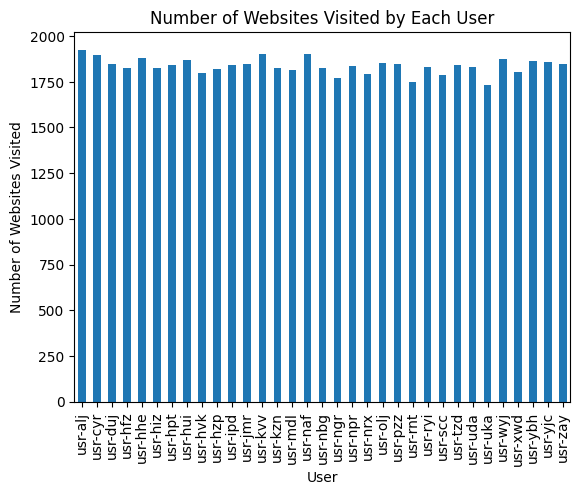

The security_count DataFrame is empty. This means no user with a security role inserted a USB


In [28]:
#Filter employee_dataframe on rows where role is 'security'
security_users = employee_data[employee_data['role'] == 'Security']
print(security_users)

merged_df = security_users.merge(web_data, on='user')


visits_by_user = merged_df.groupby('user')['website'].count()

#filter web_data dataframe for users with security role
security_users_web_data = web_data[web_data['user'].isin(employee_data[employee_data['role'] == 'Security']['user'])]

#group the data by user and count the number of rows (websites visited) for each user
websites_visited_by_user = security_users_web_data.groupby('user').size()

websites_visited_by_user.plot(kind='bar')

plt.title('Number of Websites Visited by Each User')
plt.xlabel('User')
plt.ylabel('Number of Websites Visited')

plt.show()

#####################################################################################

#employee_data and usb_data dataframes merged on 'user' column
merged_df = pd.merge(employee_data, usb_data, on="user")

#only include rows where the role is 'security'
security_df = merged_df[merged_df["role"] == "Security"]

#group security dataframe by 'user' column and count no. times each user has inserted a USB
security_count = security_df.groupby("user")["action"].count()

if security_count.empty:
    print("The security_count DataFrame is empty. This means no user with a security role inserted a USB")
else:
    security_count.plot(kind="bar", x="Security Users", y="No. of USB's inserted")

        user       role                       email     pc
13   usr-mcr  Technical  usr-mcr@onlinebargains.com   pc13
18   usr-lfl  Technical  usr-lfl@onlinebargains.com   pc18
26   usr-gsw  Technical  usr-gsw@onlinebargains.com   pc26
45   usr-qat  Technical  usr-qat@onlinebargains.com   pc45
53   usr-wgw  Technical  usr-wgw@onlinebargains.com   pc53
66   usr-udb  Technical  usr-udb@onlinebargains.com   pc66
76   usr-zoj  Technical  usr-zoj@onlinebargains.com   pc76
78   usr-peg  Technical  usr-peg@onlinebargains.com   pc78
83   usr-cvh  Technical  usr-cvh@onlinebargains.com   pc83
87   usr-gvw  Technical  usr-gvw@onlinebargains.com   pc87
94   usr-orw  Technical  usr-orw@onlinebargains.com   pc94
99   usr-tgw  Technical  usr-tgw@onlinebargains.com   pc99
102  usr-iba  Technical  usr-iba@onlinebargains.com  pc102
107  usr-ebj  Technical  usr-ebj@onlinebargains.com  pc107
109  usr-hvd  Technical  usr-hvd@onlinebargains.com  pc109
115  usr-zwd  Technical  usr-zwd@onlinebargains.com  pc1

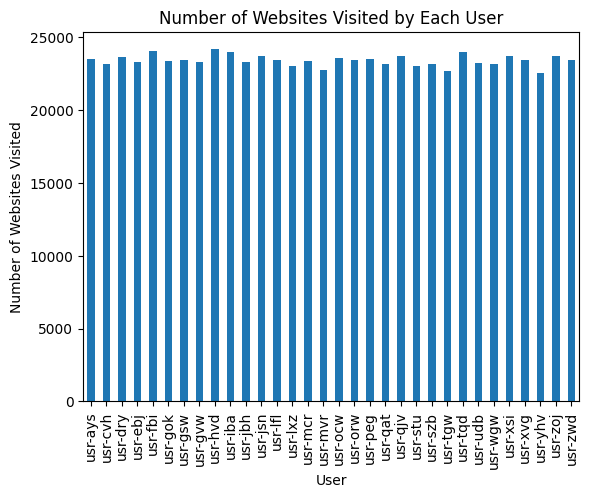

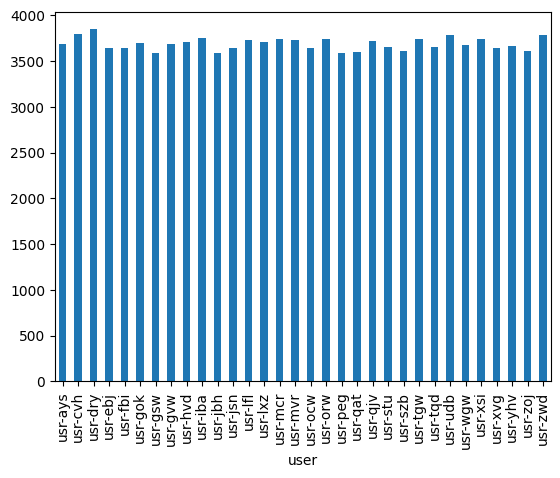

In [29]:
technical_users = employee_data[employee_data['role'] == 'Technical']
print(technical_users)
merged_df = technical_users.merge(web_data, on='user')
visits_by_user = merged_df.groupby('user')['website'].count()
technical_users_web_data = web_data[web_data['user'].isin(employee_data[employee_data['role'] == 'Technical']['user'])]

websites_visited_by_user = technical_users_web_data.groupby('user').size()

websites_visited_by_user.plot(kind='bar')


plt.title('Number of Websites Visited by Each User')
plt.xlabel('User')
plt.ylabel('Number of Websites Visited')


plt.show()

#####################################################################################

merged_df = pd.merge(employee_data, usb_data, on="user")

technical_df = merged_df[merged_df["role"] == "Technical"]

technical_count = technical_df.groupby("user")["action"].count()

if technical_count.empty:
    print("The technical_count DataFrame is empty. This means no user with a director role inserted a USB")
else:
    technical_count.plot(kind="bar", x="Technical Users", y="No. of USB's inserted")

        user      role                       email     pc
17   usr-dmi  Director  usr-dmi@onlinebargains.com   pc17
29   usr-hxr  Director  usr-hxr@onlinebargains.com   pc29
39   usr-kdj  Director  usr-kdj@onlinebargains.com   pc39
54   usr-vul  Director  usr-vul@onlinebargains.com   pc54
59   usr-bkc  Director  usr-bkc@onlinebargains.com   pc59
64   usr-lnn  Director  usr-lnn@onlinebargains.com   pc64
73   usr-hfn  Director  usr-hfn@onlinebargains.com   pc73
79   usr-bsx  Director  usr-bsx@onlinebargains.com   pc79
91   usr-sdc  Director  usr-sdc@onlinebargains.com   pc91
100  usr-vui  Director  usr-vui@onlinebargains.com  pc100
133  usr-mwj  Director  usr-mwj@onlinebargains.com  pc133
137  usr-jjg  Director  usr-jjg@onlinebargains.com  pc137
141  usr-vcj  Director  usr-vcj@onlinebargains.com  pc141
151  usr-zwq  Director  usr-zwq@onlinebargains.com  pc151
152  usr-rhd  Director  usr-rhd@onlinebargains.com  pc152
153  usr-zov  Director  usr-zov@onlinebargains.com  pc153
164  usr-nnk  

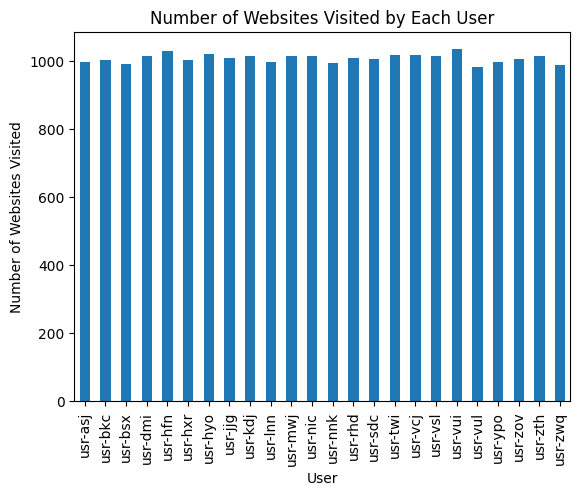

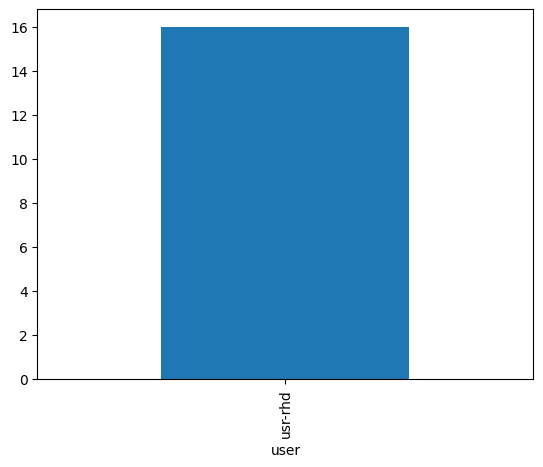

In [30]:
director_users = employee_data[employee_data['role'] == 'Director']
print(director_users)
merged_df = director_users.merge(web_data, on='user')
visits_by_user = merged_df.groupby('user')['website'].count()

director_users_web_data = web_data[web_data['user'].isin(employee_data[employee_data['role'] == 'Director']['user'])]

websites_visited_by_user = director_users_web_data.groupby('user').size()

websites_visited_by_user.plot(kind='bar')

plt.title('Number of Websites Visited by Each User')
plt.xlabel('User')
plt.ylabel('Number of Websites Visited')

plt.show()

#####################################################################################

merged_df = pd.merge(employee_data, usb_data, on="user")

director_df = merged_df[merged_df["role"] == "Director"]

director_count = director_df.groupby("user")["action"].count()

if director_count.empty:
    print("The director_count DataFrame is empty. This means no user with a director role inserted a USB")
else:
    director_count.plot(kind="bar", x="Director Users", y="No. USB's inserted")

**Breakthrough** 

This data is very interesting, as the user 'RHD' is the only user with the role director who inserted a USB(s) into a machine.
Now I want to investigate the files accessed from this user.

<AxesSubplot:title={'center':'Number of file accesses by usr-rhd'}, xlabel='Files', ylabel='No. of times accessed'>

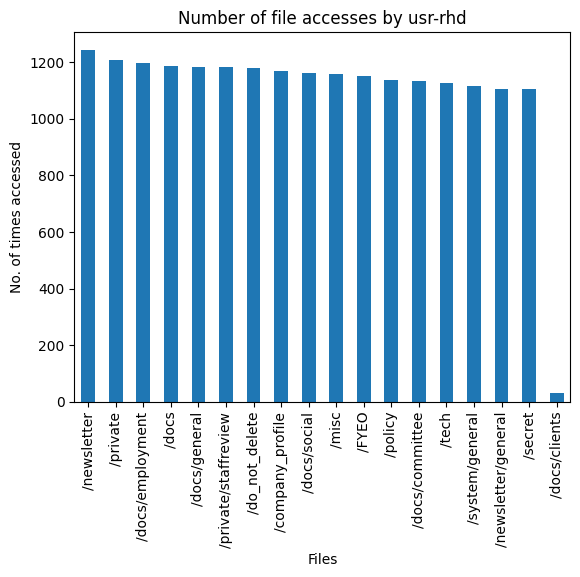

In [31]:
#create new dataframe selecting file data from user 'usr-rhd'
rhd_file_data = file_data[file_data['user'] == 'usr-rhd']
#counting how many times each file accessed
rhd_file_counts = rhd_file_data['filename'].value_counts()
#plot
rhd_file_counts.plot(kind='bar', title='Number of file accesses by usr-rhd', xlabel = 'Files', ylabel = 'No. of times accessed')

Didn't find anything interesting so now I want to investigate the websites that they visited.

http://www.hc360.com              59
http://www.twitter.com            58
http://www.psu.edu                57
http://www.accuweather.com        54
http://www.google.com             53
http://www.seesaa.net             51
http://www.bbc.co.uk              50
http://www.friendfeed.com         49
http://www.sky.com                48
http://www.theatlantic.com        47
http://www.businessinsider.com    47
http://www.eventbrite.com         47
http://www.microsoft.com          46
http://www.ebay.co.uk             45
http://www.nifty.com              45
http://www.nba.com                44
http://www.amazon.co.uk           43
http://www.posterous.com          41
http://www.prlog.org              40
http://www.eepurl.com             39
http://www.facebook.com           34
http://www.legaleagle.com          5
http://www.linkedin.com            5
Name: website, dtype: int64


<AxesSubplot:title={'center':'Websites visited by user usr-rhd'}, xlabel='Website', ylabel='Number of visits'>

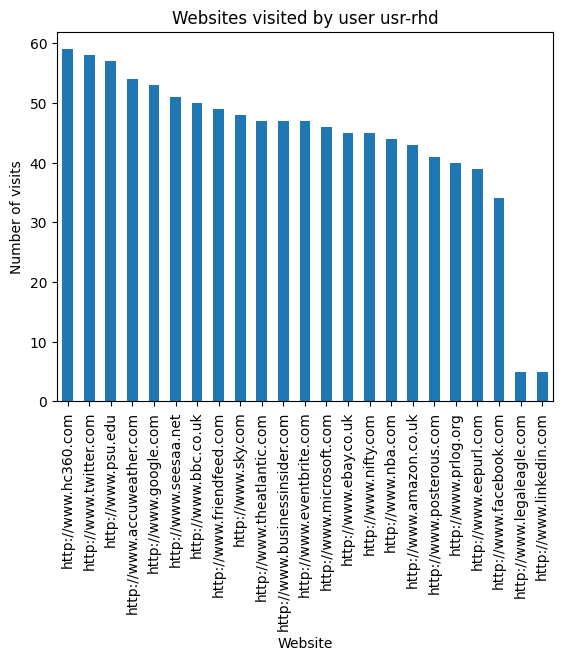

In [32]:
#web_data dataframe where user = 'usr-rhd'
user_rhd_web_data = web_data[web_data['user'] == 'usr-rhd']

#count number of times each websited visited by the user
website_count = user_rhd_web_data['website'].value_counts()

print(website_count)

website_count.plot(kind='bar', title='Websites visited by user usr-rhd', xlabel='Website', ylabel='Number of visits')


Now I want to check which PC the USB's have been inserted into. 

pc248    16
Name: pc, dtype: int64
248    usr-eie
Name: user, dtype: object
Finance


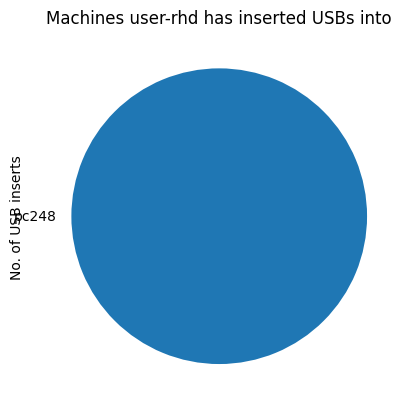

In [34]:
usb_data_rhd = usb_data[usb_data['user'] == 'usr-rhd']
pcs_inserted_counts = usb_data_rhd['pc'].value_counts()
print(pcs_inserted_counts)

pcs_inserted_counts.plot(kind='pie', xlabel='PC', ylabel='No. of USB inserts',title='Machines user-rhd has inserted USBs into')

#filter employee_data dataframe by the pc number pc248
pc_248 = employee_data[employee_data['pc'] == 'pc248']

user = pc_248['user']

print(user)

pc248_row = employee_data[employee_data['pc'] == 'pc248']
pc248_role = pc248_row['role'].iloc[0]
print(pc248_role)


**Breakthrough 2** 

After viewing the PC, user RHD has been inserting a USB into a Finance employee's machine instead of his own. This is very suspicious.

**Current Thought Process** 



-Checked USB's inserts for all users with a high clearance level -Director user 'rhd' has an unusual amount of USB inserts, the only person in his role to have any -The machine he's been inserting the USB's into is not his own machine -The machine belongs to user 'eie' of machine pc248

I now want to investigate this 'eie' user further. Below is a cell that displays the user's file activity, showing that they've been acccessing the file 'secret' many times.


<AxesSubplot:title={'center':'Number of file accessed by usr-eie'}, xlabel='Files', ylabel='No. of times accessed'>

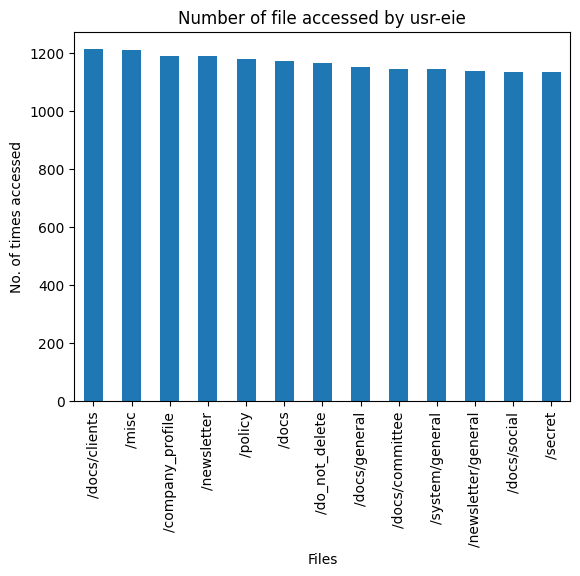

In [35]:
#filters file_data dataframe by user usr-eie
eie_file_data = file_data[file_data['user'] == 'usr-eie']
#counts file accessed no.
eie_file_counts = eie_file_data['filename'].value_counts()
#plots
eie_file_counts.plot(kind='bar', title='Number of file accessed by usr-eie', xlabel = 'Files', ylabel = 'No. of times accessed')

I also wish to view the website data for the same user

http://www.facebook.com               213
http://www.accuweather.com            208
http://www.cateringcompany.com        208
http://www.financesystem.com          205
http://www.nifty.com                  204
http://www.theatlantic.com            202
http://www.twitter.com                201
http://www.humanresourcesystem.com    200
http://www.humanresources.com         198
http://www.eventbrite.com             197
http://www.businessinsider.com        196
http://www.psu.edu                    195
http://www.sky.com                    193
http://www.eepurl.com                 193
http://www.posterous.com              190
http://www.microsoft.com              188
http://www.bbc.co.uk                  186
http://www.moneysite.com              185
http://www.ebay.co.uk                 183
http://www.prlog.org                  183
http://www.seesaa.net                 183
http://www.google.com                 183
http://www.broadcaster.com            182
http://www.friendfeed.com         

<AxesSubplot:title={'center':'Websites visited by user usr-eie'}, xlabel='Website', ylabel='Number of visits'>

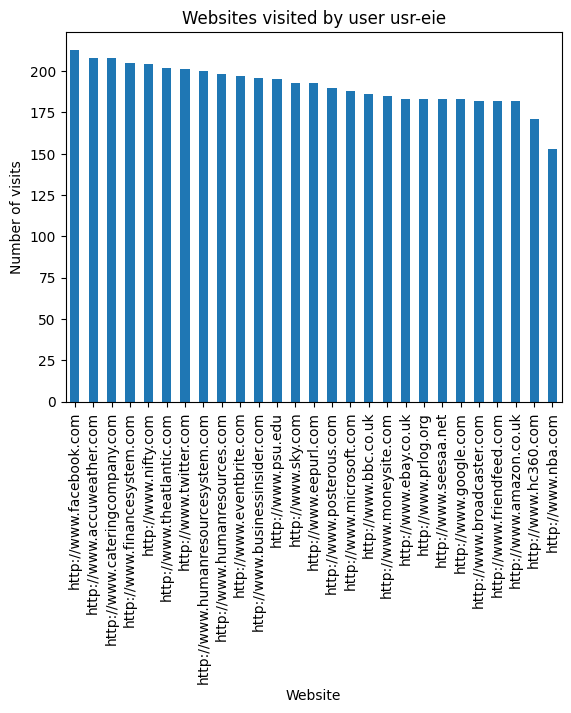

In [36]:
user_eie_web_data = web_data[web_data['user'] == 'usr-eie']
website_count = user_eie_web_data['website'].value_counts()

print(website_count)


website_count.plot(kind='bar', title='Websites visited by user usr-eie', xlabel='Website', ylabel='Number of visits')


# Conclusion - Summary of Findings

**Key Finding 1** 
 Roles include: ['Security' 'Finance' 'Legal' 'HR' 'Services' 'Technical' 'Director']. The main roles i will investigate are 'Security', 'Technical', 'Director'.
 
 **Key Finding 2** 
User 'RHD' PC 152 is the only Director to have USB inserts. This is strange as there are many users with the Director role, but only one of them has inserted USB's multiple times

**Key Finding 3** 
User 'RHD' has PC152 however, the PC they've been inserting their USB into is PC248. They inserted the USB 16 times.

**Key Finding 4** 
PC248 belongs to user 'usr-eie'. Their role is finance. This means that the director has inserted a USB into usr-eie's pc 16 times, which is a finance machine

**Conclusion** 

I believe user-rhd is the suspicious user on the network. This is because they have anomalous USB insert results that don't match any of the other user's. Furthermore, the user-rhd has been inserting USB's into a machine that is not assigned to them, and the machine belongs to a finance employee.

I believe the user-rhd was using the USB's to do suspicious activity under the identity of the finance employee 'user-eie'. 